In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
io = r'附件1语音业务用户满意度数据.xlsx'

data = pd.read_excel(io,header = [0],sheet_name = 'Sheet1')
data.head()
print(data.isnull().sum())
print(data.duplicated().sum())
print(data.shape)
print([column for column in data])

用户id                    0
语音通话整体满意度               0
网络覆盖与信号强度               0
语音通话清晰度                 0
语音通话稳定性                 0
是否遇到过网络问题               0
居民小区                    0
办公室                     0
高校                      0
商业街                     0
地铁                      0
农村                      0
高铁                      0
其他，请注明                  0
用户描述                 5158
手机没有信号                  0
有信号无法拨通                 0
通话过程中突然中断               0
通话中有杂音、听不清、断断续续         0
串线                      0
通话过程中一方听不见              0
其他，请注明.1                0
用户描述.1               5324
脱网次数                    0
mos质差次数                 0
未接通掉话次数                 0
重定向次数                4260
重定向驻留时长              4260
家宽投诉                    0
资费投诉                    0
4\5G用户                  0
语音方式                    0
是否关怀用户               5233
是否去过营业厅              2971
ARPU（家庭宽带）              0
套外流量（MB）                0
是否4G网络客户（本地剔除物联网）       5
套外流量费（元）                0
外省语音占比      

In [2]:
a=data.isnull().sum()
a = pd.DataFrame(a)
a.to_excel('附件一训练集集空值.xlsx', sheet_name='Sheet1',header=None)

In [3]:
data=data.dropna(axis=0,subset = ['终端品牌','终端品牌类型','是否4G网络客户（本地剔除物联网）','外省流量占比',"是否5G网络客户","是否实名登记用户",'客户星级标识','当月欠费金额','前第3个月欠费金额']) 



# 将是否转化为10

In [4]:
from sklearn.preprocessing import LabelEncoder
y= data.iloc[:,-4]

In [5]:
le=LabelEncoder()
le=le.fit(y)
label=le.transform(y)

In [6]:
label

array([0, 1, 0, ..., 0, 0, 0])

In [7]:
le.classes_

array(['否', '是'], dtype=object)

In [8]:
data.iloc[:,-4]=label

C:\Users\白小帅\AppData\Local\Temp\ipykernel_18528\710823335.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,-4]=label


# 空值用零填充

In [9]:
data.loc[:,('重定向驻留时长','重定向次数','是否关怀用户','是否去过营业厅')]=data.loc[:,('重定向驻留时长','重定向次数','是否关怀用户','是否去过营业厅')].fillna(0)

# 将是改为1

In [10]:
d=data.loc[:,"是否去过营业厅"]

In [11]:
for i in range(5426):
    if d.iloc[i]=='是':
        d.iloc[i]=1

C:\Users\白小帅\AppData\Local\Temp\ipykernel_18528\1323618043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.iloc[i]=1


In [12]:
d=data.loc[:,"是否关怀用户"]

In [13]:
for i in range(5426):
    if d.iloc[i]=='是':
        d.iloc[i]=1

C:\Users\白小帅\AppData\Local\Temp\ipykernel_18528\1323618043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.iloc[i]=1


# 删除大量缺失数据

In [14]:
data=data.drop(['其他，请注明.1', '其他，请注明','用户描述','用户描述.1'], axis=1)

In [15]:
print(data.isnull().sum())
print(data.duplicated().sum())
print(data.shape)

用户id                 0
语音通话整体满意度            0
网络覆盖与信号强度            0
语音通话清晰度              0
语音通话稳定性              0
是否遇到过网络问题            0
居民小区                 0
办公室                  0
高校                   0
商业街                  0
地铁                   0
农村                   0
高铁                   0
手机没有信号               0
有信号无法拨通              0
通话过程中突然中断            0
通话中有杂音、听不清、断断续续      0
串线                   0
通话过程中一方听不见           0
脱网次数                 0
mos质差次数              0
未接通掉话次数              0
重定向次数                0
重定向驻留时长              0
家宽投诉                 0
资费投诉                 0
4\5G用户               0
语音方式                 0
是否关怀用户               0
是否去过营业厅              0
ARPU（家庭宽带）           0
套外流量（MB）             0
是否4G网络客户（本地剔除物联网）    0
套外流量费（元）             0
外省语音占比               0
语音通话-时长（分钟）          0
省际漫游-时长（分钟）          0
终端品牌                 0
终端品牌类型               0
当月ARPU               0
当月MOU                0
前3月ARPU              0
前3月MOU               0
外省流量占比     

# 是否转化为10

In [16]:
y= data.iloc[:,-5]
le=LabelEncoder()
le=le.fit(y)
label=le.transform(y)


In [17]:
data.iloc[:,-5]=label

C:\Users\白小帅\AppData\Local\Temp\ipykernel_18528\1491447938.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,-5]=label


In [18]:
y= data.iloc[:,-19]
le=LabelEncoder()
le=le.fit(y)
label=le.transform(y)
data.iloc[:,-19]=label

C:\Users\白小帅\AppData\Local\Temp\ipykernel_18528\1535494718.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,-19]=label


将终端品牌中的0转化为字符

In [19]:
d=data.loc[:,'终端品牌']
for i in range(5426):
    if d.iloc[i]==0:
        d.iloc[i]=str(d.iloc[i])

C:\Users\白小帅\AppData\Local\Temp\ipykernel_18528\3382044685.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.iloc[i]=str(d.iloc[i])


In [20]:
d=data.loc[:,'终端品牌类型']
for i in range(5426):
    d.iloc[i]=str(d.iloc[i])

C:\Users\白小帅\AppData\Local\Temp\ipykernel_18528\2897173046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.iloc[i]=str(d.iloc[i])


In [21]:
from sklearn.preprocessing import OrdinalEncoder
data.loc[:,['终端品牌']]=OrdinalEncoder().fit_transform(data.loc[:,['终端品牌']])
data.loc[:,['终端品牌']]

C:\Users\白小帅\AppData\Local\Temp\ipykernel_18528\3313439004.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,['终端品牌']]=OrdinalEncoder().fit_transform(data.loc[:,['终端品牌']])


,终端品牌
0,22.0
1,11.0
2,11.0
3,22.0
4,22.0
...,...
5428,22.0
5429,22.0
5430,11.0
5431,14.0


In [22]:
data.loc[:,['终端品牌类型']]=OrdinalEncoder().fit_transform(data.loc[:,['终端品牌类型']])
data.loc[:,['终端品牌类型']]

C:\Users\白小帅\AppData\Local\Temp\ipykernel_18528\2790138607.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,['终端品牌类型']]=OrdinalEncoder().fit_transform(data.loc[:,['终端品牌类型']])


,终端品牌类型
0,43.0
1,462.0
2,571.0
3,45.0
4,34.0
...,...
5428,34.0
5429,46.0
5430,456.0
5431,221.0


In [23]:
data.loc[:,['客户星级标识']]=OrdinalEncoder().fit_transform(data.loc[:,['客户星级标识']])
data.loc[:,['客户星级标识']]

C:\Users\白小帅\AppData\Local\Temp\ipykernel_18528\933268120.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,['客户星级标识']]=OrdinalEncoder().fit_transform(data.loc[:,['客户星级标识']])


,客户星级标识
0,8.0
1,8.0
2,1.0
3,1.0
4,8.0
...,...
5428,2.0
5429,1.0
5430,8.0
5431,1.0


In [24]:
data.iloc[:,6:19]=OrdinalEncoder().fit_transform(data.iloc[:,6:19])

C:\Users\白小帅\AppData\Local\Temp\ipykernel_18528\4196254378.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,6:19]=OrdinalEncoder().fit_transform(data.iloc[:,6:19])


In [25]:
data.loc[:,['4\\5G用户','语音方式']]=OrdinalEncoder().fit_transform(data.loc[:,['4\\5G用户','语音方式']])

C:\Users\白小帅\AppData\Local\Temp\ipykernel_18528\23806209.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,['4\\5G用户','语音方式']]=OrdinalEncoder().fit_transform(data.loc[:,['4\\5G用户','语音方式']])


# MAD异常值处理法

In [26]:
d='GPRS总流量（KB）'
x=data[d].median()
MA=data[d].median()
Se=data[d]-MA
Se=abs(Se)
MC=Se.median()
MAD=MC*1.4826
Low=x-2.5*MAD
Up=x+2.5*MAD
data=data[(data[d]>=Low)&(data[d]<=Up)]

<AxesSubplot: >

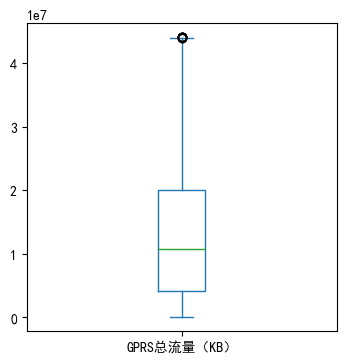

In [27]:

import matplotlib
a=plt.figure(figsize=(4,4))
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
df= data.loc[:,'GPRS总流量（KB）']
df.plot.box()

In [28]:
a.savefig(fname='MAD异常值识别法-GPRS总流量（KB）箱型图.png',dpi='figure')

In [29]:
data.shape

(4966, 51)

In [30]:

d='前3月MOU'
x=data[d].median()
MA=data[d].median()
Se=data[d]-MA
Se=abs(Se)
MC=Se.median()
MAD=MC*1.4826
Low=x-2.5*MAD
Up=x+2.5*MAD
data=data[(data[d]>=Low)&(data[d]<=Up)]

<AxesSubplot: >

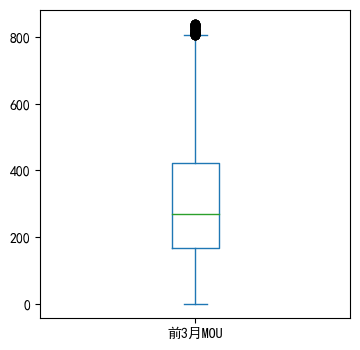

In [31]:
p=plt.figure(figsize=(4,4))
df= data.loc[:,'前3月MOU']
df.plot.box()

In [32]:
p.savefig(fname='MAD异常值识别法-前3月MOU箱型图.png',dpi='figure')

In [33]:
data.shape

(4369, 51)

# 删除与预测集无关数据

In [34]:
data=data.drop(['重定向次数','重定向驻留时长','资费投诉','语音方式','是否去过营业厅','ARPU（家庭宽带）','是否实名登记用户','当月欠费金额','前第3个月欠费金额','家宽投诉'], axis=1)

In [35]:
data.shape

(4369, 41)

# 嵌入法特征选择

In [36]:
data1=data.copy()
data1=data1.drop(['网络覆盖与信号强度', '语音通话稳定性','语音通话清晰度','用户id'], axis=1)
Ytrain=data1['语音通话整体满意度'].values
Xtrain=data1.drop('语音通话整体满意度', axis = 1).values


In [37]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC


In [38]:
RFC_ = RFC(n_estimators=100,random_state=0)#随机森林实例化


In [39]:
(RFC_.fit(Xtrain,Ytrain).feature_importances_).max()

0.0878515753806071

In [40]:
threshold = np.linspace(0,(RFC_.fit(Xtrain,Ytrain).feature_importances_).max(),100)
threshold

array([0.        , 0.00088739, 0.00177478, 0.00266217, 0.00354956,
       0.00443695, 0.00532434, 0.00621173, 0.00709912, 0.00798651,
       0.0088739 , 0.00976129, 0.01064868, 0.01153607, 0.01242346,
       0.01331084, 0.01419823, 0.01508562, 0.01597301, 0.0168604 ,
       0.01774779, 0.01863518, 0.01952257, 0.02040996, 0.02129735,
       0.02218474, 0.02307213, 0.02395952, 0.02484691, 0.0257343 ,
       0.02662169, 0.02750908, 0.02839647, 0.02928386, 0.03017125,
       0.03105864, 0.03194603, 0.03283342, 0.03372081, 0.0346082 ,
       0.03549559, 0.03638298, 0.03727037, 0.03815775, 0.03904514,
       0.03993253, 0.04081992, 0.04170731, 0.0425947 , 0.04348209,
       0.04436948, 0.04525687, 0.04614426, 0.04703165, 0.04791904,
       0.04880643, 0.04969382, 0.05058121, 0.0514686 , 0.05235599,
       0.05324338, 0.05413077, 0.05501816, 0.05590555, 0.05679294,
       0.05768033, 0.05856772, 0.05945511, 0.0603425 , 0.06122989,
       0.06211728, 0.06300467, 0.06389205, 0.06477944, 0.06566

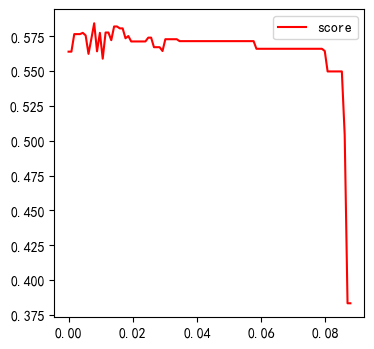

9


In [41]:
from sklearn.model_selection import cross_val_score
score=[]
for i in threshold :
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(Xtrain,Ytrain)
    once= cross_val_score(RFC_,X_embedded,Ytrain,cv=5).mean()
    score.append(once)
p=plt.figure(figsize=(4,4))
plt.plot(threshold,score,color='red',label='score')
plt.legend()
plt.show()
print(score.index(max(score)))


In [42]:
p.savefig(fname='语音通话整体满意度-嵌入法寻找最佳阈值的学习曲线.png',dpi='figure')

In [43]:
X_embedded = SelectFromModel(RFC_,threshold=threshold[score.index(max(score))]).fit_transform(Xtrain,Ytrain)
X_embedded.shape#筛选后特征数

(4369, 29)

In [44]:
from sklearn.model_selection import cross_val_score
once= cross_val_score(RFC_,X_embedded,Ytrain,cv=5).mean()

In [45]:
once

0.5843428981837532

In [46]:
importance=(RFC_.fit(Xtrain,Ytrain).feature_importances_)

In [47]:
idx_features = (-importance).argsort()[:X_embedded.shape[1]]

In [48]:
idx_features.sort()

In [49]:
X_train=pd.DataFrame(Xtrain).iloc[:,idx_features]

# 构建预测集

In [50]:
ip = r'predict1.xlsx'
predict = pd.read_excel(ip,header = [0],sheet_name = 'Sheet1')
predict.head()

,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,手机没有信号,有信号无法拨通,...,终端品牌类型,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,2,0,0,0,0,0,0,0,0,0,...,62,45.37,161,23.6,139,0.0,1391,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,176,60.00,270,60.0,102,0.0,1030,0,0,1
2,2,0,0,0,0,0,0,0,0,0,...,31,89.00,662,89.0,80,0.0,767,0,0,1
3,1,1,0,0,0,0,0,0,0,0,...,17,70.00,645,69.1,333,0.0,912,0,0,1
4,1,1,0,0,0,0,0,0,0,1,...,246,56.00,496,56.0,258,0.0,1313,0,1,1


In [51]:
predict=pd.DataFrame(predict).iloc[:,idx_features]

In [52]:
X_train

,0,1,2,4,5,6,7,8,9,10,...,25,26,27,28,30,31,32,33,34,35
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,22.0,43.0,347.32,644,480,1.0,8450801,8450801,1,8.0
1,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,462.0,111.4,902,480,1.0,17425910,17425910,1,8.0
2,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,11.0,571.0,48.0,322,413,1.0,6215849,6215849,0,1.0
3,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,22.0,45.0,49.0,139,301,1.0,5370710,5370710,1,1.0
4,1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,22.0,600.0,140.09,627,794,1.0,31131458,31131458,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4364,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,22.0,34.0,57.0,293,320,0.0,16654303,0,0,2.0
4365,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,22.0,46.0,179.89,1277,147,0.0,627901,0,1,1.0
4366,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,11.0,456.0,90.0,115,150,0.0,6816663,0,0,8.0
4367,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,14.0,221.0,19.0,179,82,0.0,1841891,0,0,1.0


In [53]:
predict

,是否遇到过网络问题,居民小区,办公室,商业街,地铁,农村,高铁,手机没有信号,有信号无法拨通,通话过程中突然中断,...,终端品牌,终端品牌类型,当月ARPU,当月MOU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,2,0,0,0,0,0,0,0,0,0,...,9,62,45.37,161,139,0.000000,1391,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,9,176,60.00,270,102,0.000000,1030,0,0,1
2,2,0,0,0,0,0,0,0,0,0,...,18,31,89.00,662,80,0.000000,767,0,0,1
3,1,1,0,0,0,0,0,0,0,1,...,18,17,70.00,645,333,0.000000,912,0,0,1
4,1,1,0,0,0,0,0,0,1,0,...,9,246,56.00,496,258,0.000000,1313,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,1,0,0,0,0,0,1,1,0,0,...,9,103,47.00,110,42,0.000000,2105,0,0,1
2595,2,0,0,0,0,0,0,0,0,0,...,18,450,57.00,238,157,0.000000,562,0,0,1
2596,2,0,0,0,0,0,0,0,0,0,...,18,36,8.10,202,194,0.000000,1948,0,1,1
2597,1,0,0,0,0,1,1,0,0,0,...,9,157,58.20,148,66,0.061913,661,151,0,1


predict.to_excel('语音通话整体满意度-预测集.xlsx', sheet_name='Sheet1', index=False)

# 构建随机森林模型

In [54]:
from sklearn import tree
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X_train,Ytrain,test_size=0.3)

In [55]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=14,criterion="gini",max_depth=30,min_samples_leaf=10)
forest.fit(Xtrain,Ytrain)
score = forest.score(Xtest,Ytest)#返回准确度

In [56]:
score

0.6071700991609459

In [57]:
forest.score(Xtrain,Ytrain)

0.6383257030739045

In [58]:
result_forest = forest.predict(predict.values)

In [59]:
pd.DataFrame(result_forest).to_excel('语音通话整体满意度_随机森林_predictresult.xlsx', sheet_name='Sheet1', index=False)

# 构建神经网络模型

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
standard_train=sc.transform(Xtrain)
standard_test=sc.transform(Xtest)



In [61]:
from sklearn.neural_network import MLPClassifier
# solver{‘lbfgs’, ‘sgd’, ‘adam’} ‘adam’在相对较大的数据集上效果比较好（几千个样本或者更多），对小数据集来说，lbfgs收敛更快效果也更好。
mlp=MLPClassifier(solver='adam',alpha=1e-5,hidden_layer_sizes=(5,5),max_iter=4000)
mlp.fit(standard_train,Ytrain)
result_mlp=mlp.predict(predict.values)
#print("测试集合的y值：",list(Y_test))
#print("神经网络预测的的y值：",list(result))
print("测试集预测的正确率为：",mlp.score(standard_test,Ytest))
print("训练集的正确率为：",mlp.score(standard_train,Ytrain))

测试集预测的正确率为： 0.6071700991609459
训练集的正确率为： 0.5830608240680183


In [62]:
result_mlp

array([10, 10, 10, ..., 10, 10, 10], dtype=int64)

In [63]:
pd.DataFrame(result_mlp).to_excel('语音通话整体满意度_神经网络_predictresult.xlsx', sheet_name='Sheet1', index=False)

# 构建XGBoost算法模型

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ytrain = le.fit_transform(Ytrain)
Ytest = le.fit_transform(Ytest)

In [65]:
from xgboost.sklearn import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(Xtrain.values,Ytrain)
xgbc.score(Xtest.values,Ytest)

0.5766590389016019

In [66]:
xgbc.score(Xtrain.values,Ytrain)

0.9941137998691956

In [67]:
result_xgbc=xgbc.predict(predict.values)+1

In [68]:
pd.DataFrame(result_xgbc).to_excel('语音通话整体满意度_XGBoost_predictresult.xlsx', sheet_name='Sheet1', index=False)

In [69]:
Ytrain=data1['语音通话整体满意度'].values
a=data1.drop('语音通话整体满意度', axis = 1)
a=pd.DataFrame(a)
a=a.iloc[:,idx_features]
Xtrain=a.values

In [70]:
test_forest=forest.predict(Xtrain)

In [71]:
test_mlp=mlp.predict(Xtrain)

In [72]:
test_xgbc=xgbc.predict(Xtrain)+1

In [73]:
import pandas
allreuslt= pd.concat([pd.DataFrame(result_forest),pd.DataFrame(result_mlp),pd.DataFrame(result_xgbc)],axis=1) 
alltrain= pd.concat([pd.DataFrame(test_forest),pd.DataFrame(test_mlp),pd.DataFrame(test_xgbc)],axis=1) 

In [74]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(alltrain,Ytrain,test_size=0.3)

# 构建融合模型

In [75]:
from sklearn.linear_model import LinearRegression
#线性回归
lr=LinearRegression().fit(Xtrain,Ytrain)
print(lr.score(Xtrain,Ytrain))
print(lr.score(Xtest,Ytest))

0.6961961138869273
0.7924999535117173


In [76]:
a=lr.predict(allreuslt)

In [77]:
a

array([9.65987431, 7.89790695, 9.65987431, ..., 9.65987431, 9.65987431,
       9.65987431])

In [78]:
a=a.round(0)

In [79]:
pd.DataFrame(a).to_excel('语音通话整体满意度_predict_result.xlsx', sheet_name='Sheet1', index=False)